Переберите параметры с помощью GridSearchCV и обучите Random Forest на данных, указанных в предыдущем стэпе. Передайте в GridSearchCV модель с указанием random_state


RandomForestClassifier(random_state=0)


Параметры для выбора:


- n_estimators: от 10 до 50 с шагом 10


- max_depth: от 1 до 12 с шагом 2


- min_samples_leaf: от 1 до 7


- min_samples_split: от 2 до 9 с шагом 2


Укажите cv=3. Для ускорения расчётов в GridSearchCV можно указать n_jobs=-1, чтобы использовать все процессоры.




In [33]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
%matplotlib inline

In [10]:
data = pd.read_csv("../data/training_mush.csv")

params = {
    "n_estimators": range(10, 51, 10),
    "max_depth": range(1, 13, 2),
    "min_samples_leaf": range(1, 8),
    "min_samples_split": range(2, 10, 2)
}
data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [11]:
X_train = data.iloc[:, :-1]
y_train = data.iloc[:, -1]

In [12]:
clf = RandomForestClassifier()
search = GridSearchCV(clf, params, n_jobs=-1, cv = 3)

search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [13]:
search.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

--- 
Какие параметры Random Forest были отобраны как наилучшие для решения на этих данных?

- Выбранное число деревьев в лесу - 10
- глубина деревьев - 9
- минимальное число образцов в листах - 1
- а минимальное число образцов для сплита - 2

---
Выберите правильные утверждения о важности фичей для нашего классификатора



,importance
gill-size,0.159675
spore-print-color,0.125475
odor,0.110642
ring-type,0.108284
stalk-root,0.092681
gill-color,0.076433
gill-spacing,0.061596
population,0.047315
stalk-surface-below-ring,0.043394
bruises,0.042867


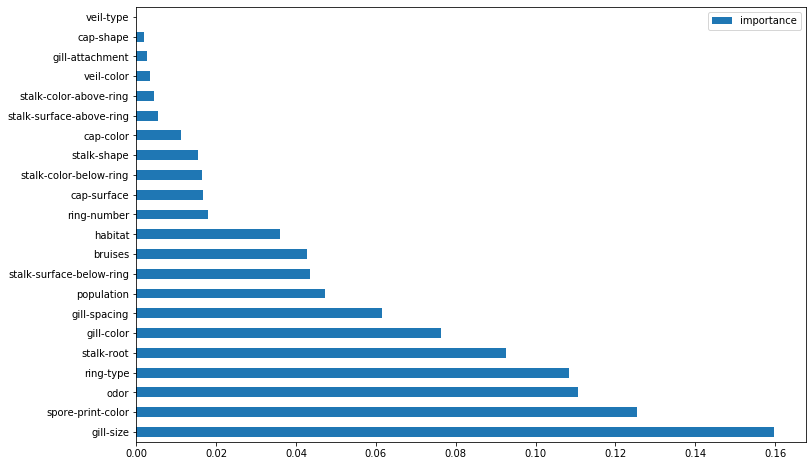

In [29]:
imp = pd.DataFrame(search.best_estimator_.feature_importances_,
                   index=X_train.columns,
                   columns=['importance']
                  )

imp.sort_values('importance', inplace=True, ascending=False)
imp.plot(kind='barh', figsize=(12, 8))
i = imp.index
imp

In [50]:
cols = ("habitat stalk-shape odor".split(),
        "odor population gill-attachment".split(),
        "stalk-color-below-ring stalk-root odor".split(),
        "cap-surface odor gill-attachment".split()
       )
for names in cols:
    res = list(map(lambda x: np.where(i == x)[0][0], names))
    print(names, res)

['habitat', 'stalk-shape', 'odor'] [10, 14, 2]
['odor', 'population', 'gill-attachment'] [2, 7, 19]
['stalk-color-below-ring', 'stalk-root', 'odor'] [13, 4, 2]
['cap-surface', 'odor', 'gill-attachment'] [12, 2, 19]


---
---
Теперь у нас есть классификатор, определяющий какие грибы съедобные, а какие нет, испробуем его! Предскажите съедобность этих данных грибов и напишите в ответ число несъедобных грибов (класс равен 1).

 

Заметьте, что для использования этого леса на новых грибах, нам нужно будет заполнить значения параметров гриба, часть из которых определить проще (например, цвет шляпки), а для определения части понадобится специалист-миколог.
То есть в этом случае нам придётся самим экстрагировать признаки из объекта. Для зрительных признаков типа формы, цвета можно использовать более сложную модель (например, свёрточную нейронную сеть) и подавать на вход фотки гриба. И модель сама извлечёт признаки вместо того, чтобы нам описывать самим. Но одной фоткой тут не отделаешься - для определения запаха понадобится ещё детектор

In [52]:
data = pd.read_csv("../data/testing_mush.csv")
data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4


In [64]:
y = search.predict(data)
y.sum()

976

In [66]:
pd.DataFrame(y).to_csv("../data/tmp")